In [1]:
pip install -U scikit-learn

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy

In [3]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [4]:
ls

Dataset.csv  sample_data/


In [5]:
data = pd.read_csv("Dataset.csv")

In [6]:
data.head()

,Video ID,Comment ID,comments,Likes
0,MwpMEbgC7DA,UgxyyOolFRhwZzdeH6B4AaABAg,Almost 2022 and this song is still a m...,2770
1,MwpMEbgC7DA,UgyJIBcVyyE3WIIzpOt4AaABAg,It's November 2021 let's see how many ...,1969
2,MwpMEbgC7DA,UgyPundPLD47qRbQXfZ4AaABAg,This song has such a different atmospher...,1195
3,MwpMEbgC7DA,UgwyC5O-P3BBQ8lhFv54AaABAg,This song has a powerful hit in it,24
4,MwpMEbgC7DA,UgxAI_FkDVq-jWHWSdB4AaABAg,I just can t stop listening to it,10


In [7]:
data.shape

(1073, 4)

In [8]:
data['polarity'] = data['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [9]:
data.head()

,Video ID,Comment ID,comments,Likes,polarity
0,MwpMEbgC7DA,UgxyyOolFRhwZzdeH6B4AaABAg,Almost 2022 and this song is still a m...,2770,0.000000
1,MwpMEbgC7DA,UgyJIBcVyyE3WIIzpOt4AaABAg,It's November 2021 let's see how many ...,1969,0.500000
2,MwpMEbgC7DA,UgyPundPLD47qRbQXfZ4AaABAg,This song has such a different atmospher...,1195,0.045833
3,MwpMEbgC7DA,UgwyC5O-P3BBQ8lhFv54AaABAg,This song has a powerful hit in it,24,0.300000
4,MwpMEbgC7DA,UgxAI_FkDVq-jWHWSdB4AaABAg,I just can t stop listening to it,10,0.000000


## Shuffle the dataset

In [10]:
data = data.sample(frac=1).reset_index(drop=True)

In [11]:
data['pol_cat']  = 0

Continuous to categorical

In [12]:
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
data.head()

,Video ID,Comment ID,comments,Likes,polarity,pol_cat
0,MwpMEbgC7DA,Ugyms_knCg_pcQiVmiZ4AaABAg,this song hits different when your in p...,282,-0.250000,0
1,MwpMEbgC7DA,Ugy00QFAbMDtiO7NipR4AaABAg,I adore talking at the comments,0,0.000000,0
2,MwpMEbgC7DA,UgwkrC3LeADrsL8mRwJ4AaABAg,have been used up on another love all ...,0,0.500000,1
3,MwpMEbgC7DA,UgzZTgnJZ1gAty8psOt4AaABAg,Dear Ana If you're reading this th...,406,0.309804,1
4,MwpMEbgC7DA,UgzQfygJGxJRiYCLeD14AaABAg,Well Men Everyone who is with broken...,1,0.170000,1


In [14]:
data['pol_cat'].value_counts()

0    551
1    522
Name: pol_cat, dtype: int64

Create separate dataframes for Negative,Positive & Neutral comments 

In [22]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == 0]
data_neg = data_neg.reset_index(drop = True)

In [23]:
data_pos.head()

,Video ID,Comment ID,comments,Likes,polarity,pol_cat
0,MwpMEbgC7DA,UgwkrC3LeADrsL8mRwJ4AaABAg,have been used up on another love all ...,0,0.500000,1
1,MwpMEbgC7DA,UgzZTgnJZ1gAty8psOt4AaABAg,Dear Ana If you're reading this th...,406,0.309804,1
2,MwpMEbgC7DA,UgzQfygJGxJRiYCLeD14AaABAg,Well Men Everyone who is with broken...,1,0.170000,1
3,MwpMEbgC7DA,UgwCVnTo6WNOK9MRYXF4AaABAg,the song 8 years ago the comments a...,958,0.325000,1
4,MwpMEbgC7DA,UgwT4zeuS3mNiCrrHOt4AaABAg,Classic,0,0.166667,1


In [24]:
data_pos.shape

(522, 6)

In [25]:
data_neg.head()

,Video ID,Comment ID,comments,Likes,polarity,pol_cat
0,MwpMEbgC7DA,Ugyms_knCg_pcQiVmiZ4AaABAg,this song hits different when your in p...,282,-0.25,0
1,MwpMEbgC7DA,Ugy00QFAbMDtiO7NipR4AaABAg,I adore talking at the comments,0,0.00,0
2,MwpMEbgC7DA,UgxD7-qO8CURg2a6vyd4AaABAg,one of my favourite songs,0,0.00,0
3,MwpMEbgC7DA,UgwZSufEaNKTXkcVfnZ4AaABAg,8 years ago How did I miss this song,17,0.00,0
4,MwpMEbgC7DA,UgxP-VIVJGoslJG3n8x4AaABAg,i'ts me or he looks like Ash from bana...,0,0.00,0


In [27]:
data_neg['comments'][1]

'I  adore  talking  at  the  comments  '

0    551
1    522
Name: pol_cat, dtype: int64

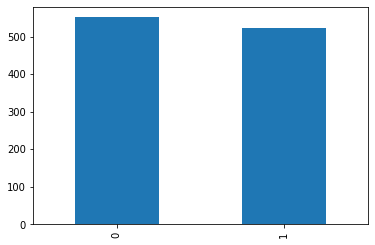

In [28]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

## Data Preprocessing

Lower the text in comments

In [29]:
data['comments'] = data['comments'].str.lower()

In [30]:
data['comments'].head()

0    this  song  hits  different  when  your  in  p...
1               i  adore  talking  at  the  comments  
2    have  been  used  up  on  another  love  all  ...
3    dear  ana      if  you're  reading  this    th...
4    well  men      everyone  who  is  with  broken...
Name: comments, dtype: object

In [31]:
data.describe()

,Likes,polarity,pol_cat
count,1073.000000,1073.000000,1073.000000
mean,574.575955,0.159167,0.486486
std,2170.601964,0.318115,0.500050
min,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,128.000000,0.361667,1.000000
max,27841.000000,1.000000,1.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Video ID    1073 non-null   object 
 1   Comment ID  1073 non-null   object 
 2   comments    1073 non-null   object 
 3   Likes       1073 non-null   int64  
 4   polarity    1073 non-null   float64
 5   pol_cat     1073 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 50.4+ KB


In [33]:
data['comments'][0]

'this  song  hits  different  when  your  in  pain  and  sad  '

In [34]:
data['comments'][0].strip()

'this  song  hits  different  when  your  in  pain  and  sad'

In [35]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [38]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
stop_words = set(stopwords.words('english'))

In [41]:
data['comments'] = data['comments'].str.strip()

In [42]:
train = data.copy()

In [43]:
train['comments'] = train['comments'].str.strip()

In [44]:
train['comments'][0]

'this  song  hits  different  when  your  in  pain  and  sad'

In [45]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [46]:
data['stop_comments'] = data['comments'].apply(lambda x : remove_stopwords(x))

In [47]:
data.head()

,Video ID,Comment ID,comments,Likes,polarity,pol_cat,stop_comments
0,MwpMEbgC7DA,Ugyms_knCg_pcQiVmiZ4AaABAg,this song hits different when your in p...,282,-0.250000,0,song hits different pain sad
1,MwpMEbgC7DA,Ugy00QFAbMDtiO7NipR4AaABAg,i adore talking at the comments,0,0.000000,0,adore talking comments
2,MwpMEbgC7DA,UgwkrC3LeADrsL8mRwJ4AaABAg,have been used up on another love all ...,0,0.500000,1,used another love tears want sing song 'd love
3,MwpMEbgC7DA,UgzZTgnJZ1gAty8psOt4AaABAg,dear ana if you're reading this th...,406,0.309804,1,dear ana 're reading would like apologize stro...
4,MwpMEbgC7DA,UgzQfygJGxJRiYCLeD14AaABAg,well men everyone who is with broken...,1,0.170000,1,well men everyone broken heart welcome club sl...


In [48]:
data.to_csv('Dataset-with-sentiments.csv')